# Диагностика моделей и предобработка данных

Подготовлено на основе [материалов с сайта Коротеева М.В.](https://koroteev.site/ml/)

## Диагностика моделей

1.1 Загрузите датасет `breast_cancer`. Выберите два первых признака. Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2] # 2 first signs
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2)

1.2 Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [52]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

SVC(C=0.01)

In [53]:
print("Score_train ", clf.score(X_train, y_train))
print("Score_test ", clf.score(X_test, y_test))

Score_train  0.6967032967032967
Score_test  0.6666666666666666


1.3 Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
* собрать больше объектов наблюдения;
* провести обучение на меньшем объеме данных;
* исключить часть признаков из модели;
* добавить новые признаки в модель;
* добавить полиномиальные признаки;
* попробовать более сложные модели;
* попробовать более простые модели;
* увеличить регуляризацию модели;
* уменьшить регуляризацию модели;

Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [54]:
len(X_train) // 100 + 10

14

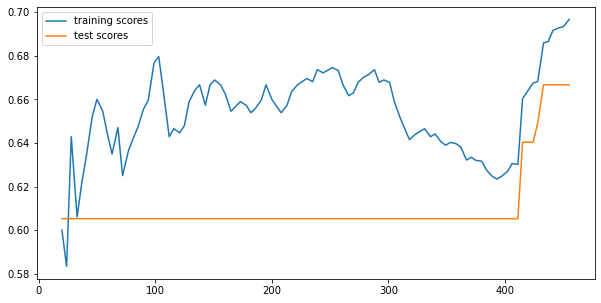

In [55]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 100):
    clf = SVC(C=0.01, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Тестовая точность, в зависимости от размера обучающей выборки, чаще оказалась значительно ниже обучающей (точность на обучающей резко возрастает, а затем немного снижается в вновь "подскакивает", приближаясь к тестовой), хотя с ее увеличением становится близка к обучающей. 

Это свидетельствует о потенциальном переобучении модели. 

Для ее совершенствования можно увеличить регуляризацию или использовать более простые модели.

In [56]:
# С=10
clf = SVC(C=10, kernel="rbf")
clf.fit(X_train, y_train)
print("Score_train ", clf.score(X_train, y_train))
print("Score_test ", clf.score(X_test, y_test)) # и тестовая, и обучающая точности возрасли

Score_train  0.9142857142857143
Score_test  0.868421052631579


In [57]:
# модель полегче: LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
print("Score_train ", LR.score(X_train, y_train))
print("Score_test ", LR.score(X_test, y_test)) # также и тестовая, и обучающая точности возрасли

Score_train  0.8945054945054945
Score_test  0.8771929824561403


In [58]:
# модель полегче: KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
print("Score_train ", KNC.score(X_train, y_train))
print("Score_test ", KNC.score(X_test, y_test)) # также и тестовая, и обучающая точности возрасли

Score_train  0.9186813186813186
Score_test  0.8421052631578947


1.4 Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000 (без использования специальных методик подбора параметров). Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение? Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели

In [ ]:
# разобью на кусочки для рассчета, чтобы было не так сложно

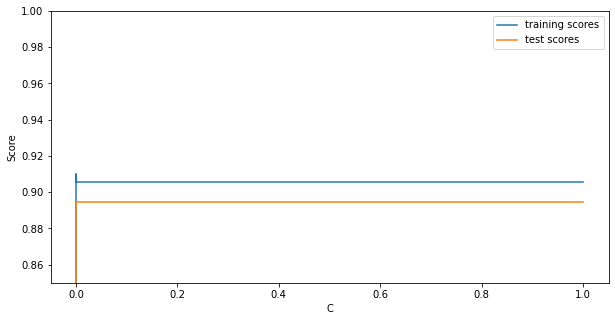

In [68]:
training_scores = []
test_scores = []
numbers = []
maxi = {}

for i in np.linspace(0.0001, 1, 500):
    clf = SVC(C=i, kernel='rbf')
    clf.fit(X_train, y_train)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    maxi[i] = [clf.score(X_train, y_train), clf.score(X_test, y_test)]

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.ylim([0.85,1])
plt.xlabel('С')
plt.ylabel('Score')
plt.legend(loc="best")

In [ ]:
# модель недообучается

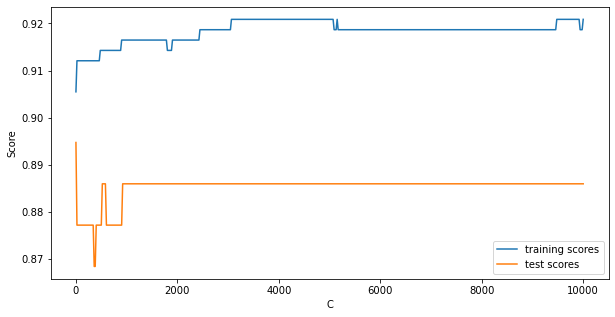

In [71]:
training_scores = []
test_scores = []
numbers = []
maxi_2 = {}

for i in np.linspace(1, 10000, 500):
    clf = SVC(C=i, kernel='rbf')
    clf.fit(X_train, y_train)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    maxi_2[i] = [clf.score(X_train, y_train), clf.score(X_test, y_test)]

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
#plt.ylim([0.85,1])
plt.xlabel('С')
plt.ylabel('Score')
plt.legend(loc="best")

In [ ]:
# с увеличением регуляризационного параметра модель переобучается (смысла идти в большую сторону нет)

1.5 Найдите методом подбора оптимальное значение параметра регуляризации.

In [69]:
print(max(maxi, key=maxi.get))

0.49904809619238477


In [70]:
maxi[0.49904809619238477] # при C = 0.49904809619238477 наибольшие точности тестовой и обучающей выборки:

[0.9098901098901099, 0.8947368421052632]

In [72]:
print(max(maxi_2, key=maxi_2.get))

3066.825651302605


In [73]:
maxi[0.49904809619238477] # при C = 3066.825651302605 наибольшие точности тестовой и обучающей выборки:

[0.9098901098901099, 0.8947368421052632]

## Предварительная обработка данных

In [349]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2.1 Загрузите и прочитайте в pandas [датасет](https://raw.githubusercontent.com/ParthRajauria/DataScienceProject-1/master/cars_sampled.csv). При загрузке укажите корректные типы данных для всех столбцов, где это необходимо. Все числовые значения переведите в формат int.

In [350]:
df = pd.read_csv('cars_sampled.csv', parse_dates = ['dateCreated', 'lastSeen', 'dateCrawled'])
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


In [351]:
df.info() # уже int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

2.2 Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [352]:
df.shape # размер

(50001, 19)

In [353]:
df.dtypes # типы переменных

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [354]:
df.isna().sum() # пустые значения

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [355]:
df.nunique() # уникальные имена

dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64

In [356]:
df.describe() # другая статистика

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [357]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.017604,0.020429,-0.045458,0.000582,0.005916
yearOfRegistration,0.017604,1.000000,-0.004394,-0.064188,-0.023152,-0.001615
powerPS,0.020429,-0.004394,1.000000,-0.016447,0.034345,0.017415
kilometer,-0.045458,-0.064188,-0.016447,1.000000,0.001985,-0.024076
monthOfRegistration,0.000582,-0.023152,0.034345,0.001985,1.000000,0.019050
postalCode,0.005916,-0.001615,0.017415,-0.024076,0.019050,1.000000


2.3 Для каждого числового столбца (кроме price) постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

yearOfRegistration


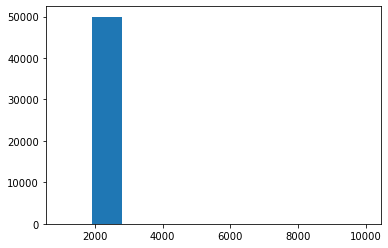

powerPS


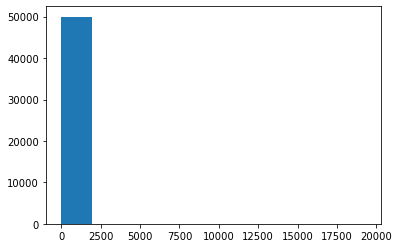

kilometer


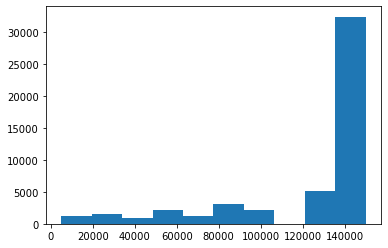

monthOfRegistration


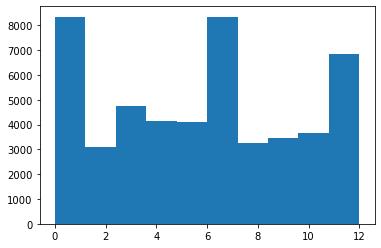

postalCode


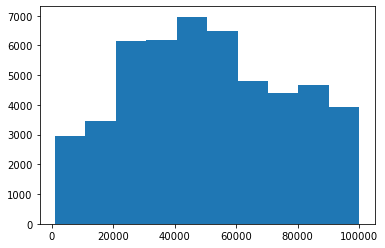

In [358]:
for i in ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']:
    print(i)
    plt.hist(df[i])
    plt.show()

yearOfRegistration


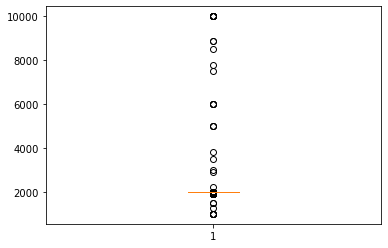

powerPS


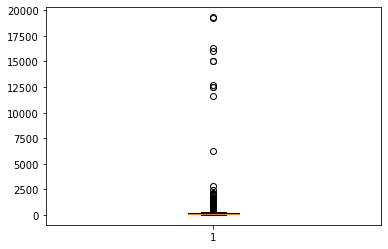

kilometer


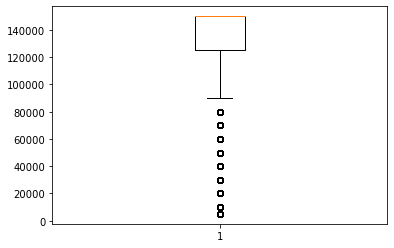

monthOfRegistration


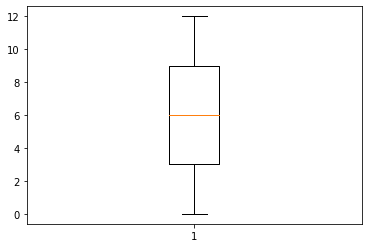

postalCode


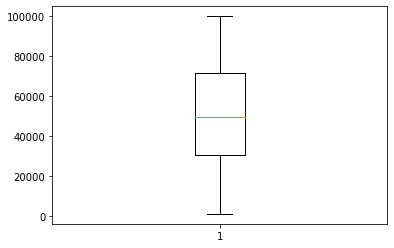

In [359]:
for i in ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [360]:
# удалим выбросы

In [361]:
for i in ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']:
    q_75, q_25 = np.percentile(df.loc[:,i], [75, 25])
    urange = q_75 - q_25
    maxi = q_75 + (1.5 * urange)
    mini = q_25 - (1.5 * urange)
    df.loc[df[i] > maxi, i] = np.nan
    df.loc[df[i] < mini, i] = np.nan

In [362]:
# посмотрим что получилось

yearOfRegistration


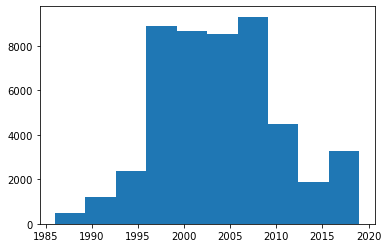

powerPS


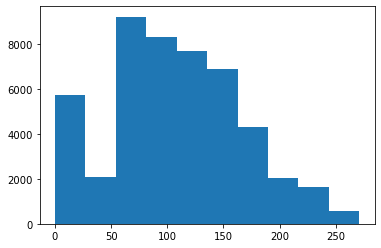

kilometer


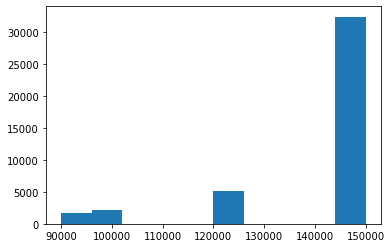

monthOfRegistration


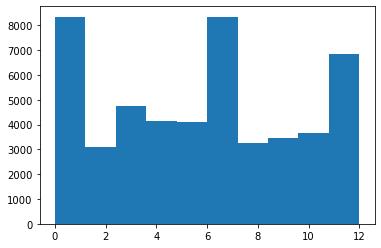

postalCode


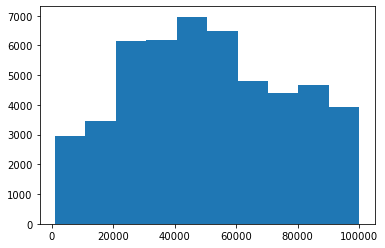

In [363]:
for i in ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']:
    print(i)
    plt.hist(df[i])
    plt.show()

yearOfRegistration


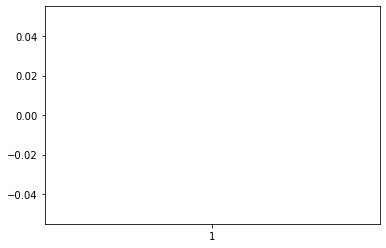

powerPS


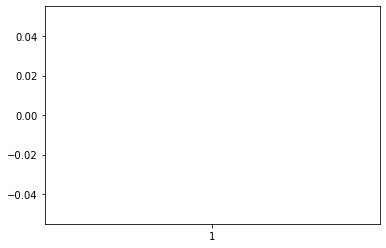

kilometer


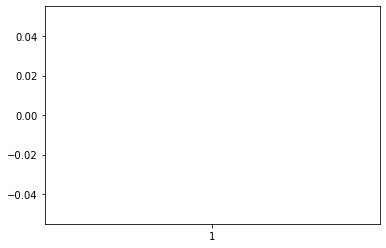

monthOfRegistration


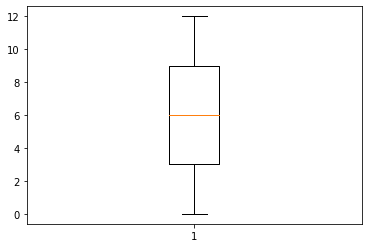

postalCode


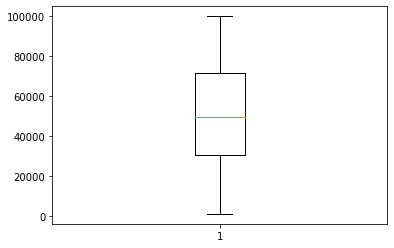

In [364]:
for i in ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']:
    print(i)
    plt.boxplot(df[i])
    plt.show()

yearOfRegistration


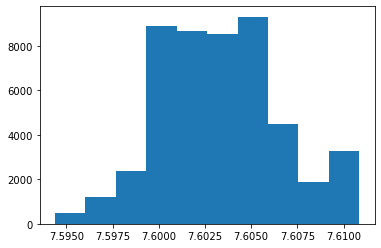

powerPS


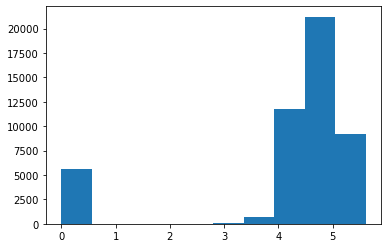

kilometer


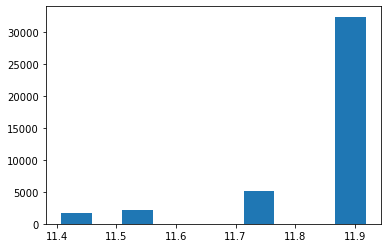

monthOfRegistration


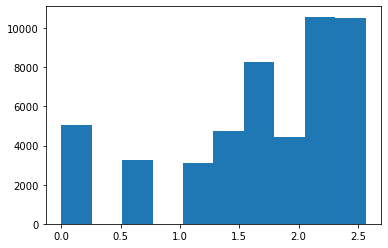

postalCode


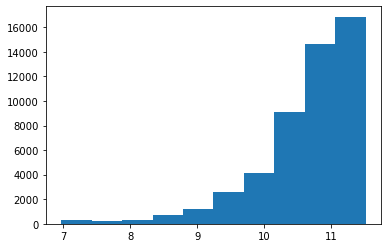

In [365]:
# к норм распределению логорифмир-ем
for i in ['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']:
    df[i] = np.log(df[i] + 1)
    print(i)
    plt.hist(df[i])
    plt.show()

2.4 Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

<AxesSubplot:xlabel='gearbox', ylabel='price'>

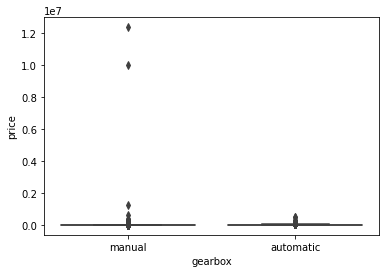

In [366]:
sns.boxplot(x = df['gearbox'], y = df['price'])

<AxesSubplot:xlabel='fuelType', ylabel='price'>

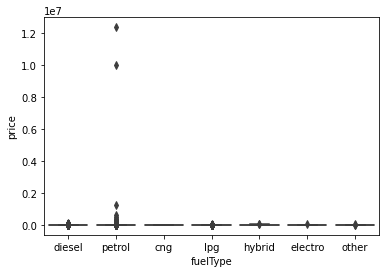

In [367]:
sns.boxplot(x = df['fuelType'], y = df['price'])

<AxesSubplot:xlabel='fuelType', ylabel='price'>

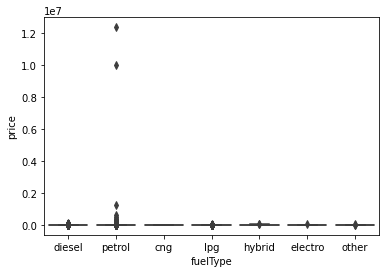

In [368]:
sns.boxplot(x=df["fuelType"], y=df["price"])

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

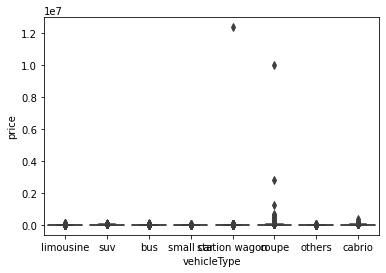

In [369]:
sns.boxplot(x = df['vehicleType'], y = df['price'])

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

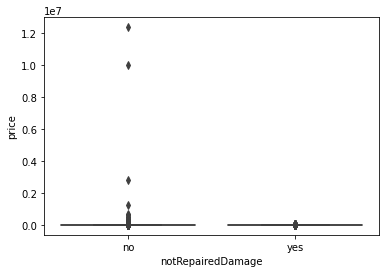

In [370]:
sns.boxplot(x = df['notRepairedDamage'], y = df['price'])

In [371]:
# уберем выбросы
vibrosy = df.price.sort_values(ascending=False)[:3].to_list()

In [372]:
df.shape

(50001, 19)

In [373]:
for i in vibrosy:
    df = df.drop(np.where(df['price'] == i)[0])

In [374]:
df.shape

(49998, 19)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

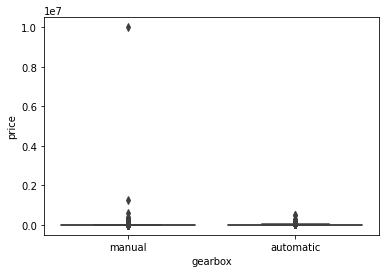

In [375]:
sns.boxplot(x = df['gearbox'], y = df['price'])

2.5 Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [376]:
nans = df.isna().sum()
nans[nans > 0]

vehicleType           5187
yearOfRegistration     959
gearbox               2823
powerPS               1505
model                 2757
kilometer             8671
fuelType              4502
notRepairedDamage     9715
dtype: int64

Удалим признак с самым большим количеством пропусков - notRepairedDamage

In [377]:
df = df.drop(['notRepairedDamage'], axis = 1)

In [378]:
nans = df.isna().sum()
nans[nans > 0]

vehicleType           5187
yearOfRegistration     959
gearbox               2823
powerPS               1505
model                 2757
kilometer             8671
fuelType              4502
dtype: int64

Пропущенные значения в цене, километраже и мощности заменим на среднее

In [379]:
for i in ['yearOfRegistration', 'powerPS', 'kilometer']:
    df[i] = df[i].fillna(df[i].mean())

In [380]:
nans = df.isna().sum()
nans[nans > 0]

vehicleType    5187
gearbox        2823
model          2757
fuelType       4502
dtype: int64

Значения категориальных признаков заменим на моду

In [381]:
for i in ['vehicleType', 'gearbox', 'model', 'fuelType']:
    df[i] = df[i].fillna(df[i].mode()[0])

In [382]:
nans = df.isna().sum()
nans[nans > 0]

Series([], dtype: int64)

2.6 Закодируйте нечисловые характеристики при помощи одного из известных вам методов кодирования

In [383]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'dateCreated',
       'postalCode', 'lastSeen'],
      dtype='object')

In [384]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration            float64
gearbox                        object
powerPS                       float64
model                          object
kilometer                     float64
monthOfRegistration           float64
fuelType                       object
brand                          object
dateCreated            datetime64[ns]
postalCode                    float64
lastSeen               datetime64[ns]
dtype: object

In [385]:
for i in ['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand']:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

In [386]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,37985,1,0,4450,1,3,7.602900,1,5.017280,11,11.918397,1.386294,1,2,2016-03-30,9.916305,2016-07-04 04:44:00
1,2016-07-03 09:54:00,37230,1,0,13299,0,7,7.603898,1,5.099866,242,11.918397,1.945910,1,39,2016-07-03,11.385615,2016-03-26 13:17:00
2,2016-01-04 00:57:00,36526,1,0,3200,1,0,7.602900,1,4.624973,220,11.918397,2.484907,1,38,2016-03-31,10.220121,2016-01-04 08:40:00
3,2016-03-19 17:50:00,27738,1,0,4500,0,5,7.604396,1,4.465908,120,11.854697,2.564949,6,30,2016-03-19,10.449815,2016-07-04 04:44:00
4,2016-03-16 14:51:00,37239,1,0,18750,1,7,7.605392,0,5.225747,242,11.918397,2.484907,1,39,2016-03-16,10.920004,2016-01-04 23:18:00


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          49998 non-null  datetime64[ns]
 1   name                 49998 non-null  int32         
 2   seller               49998 non-null  int8          
 3   offerType            49998 non-null  int8          
 4   price                49998 non-null  int64         
 5   abtest               49998 non-null  int8          
 6   vehicleType          49998 non-null  int8          
 7   yearOfRegistration   49998 non-null  float64       
 8   gearbox              49998 non-null  int8          
 9   powerPS              49998 non-null  float64       
 10  model                49998 non-null  int16         
 11  kilometer            49998 non-null  float64       
 12  monthOfRegistration  49998 non-null  float64       
 13  fuelType             49998 non-

2.7 Постройте модель регрессии для цены автомобиля. Обучите ее на данных, полученных из исходного датасета с применением 
методов заполнения пропущенных значений и кодирования нечисловых признаков.

In [523]:
'''import datetime as dt
df['dateCrawled'] = df['dateCrawled'].map(dt.datetime.toordinal)
df['dateCreated'] = df['dateCreated'].map(dt.datetime.toordinal)
df['lastSeen'] = df['lastSeen'].map(dt.datetime.toordinal)'''

"import datetime as dt\ndf['dateCrawled'] = df['dateCrawled'].map(dt.datetime.toordinal)\ndf['dateCreated'] = df['dateCreated'].map(dt.datetime.toordinal)\ndf['lastSeen'] = df['lastSeen'].map(dt.datetime.toordinal)"

In [389]:
X = df.drop(columns = ['price'])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [390]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [398]:
y_pred = model.predict(X_test)
print('R^2 score:', r2_score(y_test, y_pred))
print('Score_train:', model.score(X_train, y_train))
print('Score_test:', model.score(X_test, y_test))

R^2 score: 0.12279773440453046
Score_train: 0.007116156548718333
Score_test: 0.12279773440453046


In [ ]:
# модель имеет очень слабые показатели...

## Решение задачи на основе данных с kaggle

3.1 На сайте [kaggle](https://www.kaggle.com/datasets) выбрать набор данных каждому студенту индивидуально. Датасет должен удовлетворять следующим условиям:
* иметь не очень большой размер (не более 100мб)
* содержать пропуски
* содержать нечисловые столбцы.

Привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов)

In [486]:
df = pd.read_csv('Cars_sale.csv')
df.head()

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,Bangalore,380000.0,35056.0,Petrol,2nd Owner,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,Bangalore,465000.0,44.0,Petrol,1st Owner,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,Bangalore,1350000.0,42917.0,Petrol,NaN,2018,Hyundai
3,Hyundai Venue - 2019,Chennai,1019699.0,16112.0,Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz - 2017,Pune,713499.0,30988.0,Petrol,2nd Owner,2017,Honda


In [487]:
df.shape

(1032, 8)

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1032 non-null   object 
 1   Location    1030 non-null   object 
 2   Price       1026 non-null   float64
 3   Kms_driven  1030 non-null   float64
 4   Fuel_type   1032 non-null   object 
 5   Owner       743 non-null    object 
 6   Year        1032 non-null   int64  
 7   Company     1032 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.6+ KB


#### Этот набор данных содержит данные о 1032 подержанных автомобилях и содержит следующие характеристики о них:

 - Имя модели автомобиля (Name)
 - Текущее местоположение продажи (Location)
 - Выставленная на продажу цена, Rupee (Price)
 - Пробег, км (Kms_driven)
 - Тип топлива (Fuel_type)
 - Количество владельцев (Owner)
 - Год (Year)
 - Марка автомобиля (Company)
##### Целевая переменная - цена (price), общее количество признаков = 8 (включая target)
##### Основная задача обучения - регрессия (предсказать цены на подержанные автомобили)

In [489]:
df.describe()

,Price,Kms_driven,Year
count,1.026000e+03,1030.000000,1032.000000
mean,6.834892e+05,32306.406796,2015.810078
std,5.401422e+05,42092.814446,3.396920
min,3.900000e+01,0.000000,2000.000000
25%,4.104990e+05,95.500000,2014.000000
50%,5.576990e+05,22280.500000,2016.000000
75%,7.885990e+05,48866.250000,2018.000000
max,7.500000e+06,690000.000000,2022.000000


In [490]:
df.isna().sum()

Name            0
Location        2
Price           6
Kms_driven      2
Fuel_type       0
Owner         289
Year            0
Company         0
dtype: int64

In [491]:
df.nunique()

Name          691
Location       39
Price         802
Kms_driven    825
Fuel_type      10
Owner           3
Year           23
Company        25
dtype: int64

In [492]:
df.corr()

,Price,Kms_driven,Year
Price,1.000000,-0.027398,0.392302
Kms_driven,-0.027398,1.000000,-0.141198
Year,0.392302,-0.141198,1.000000


3.2 Провести описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

* исследование шкалы измерения каждого существенного признака

In [493]:
df.columns

Index(['Name', 'Location', 'Price', 'Kms_driven', 'Fuel_type', 'Owner', 'Year',
       'Company'],
      dtype='object')

In [494]:
for i in ['Name', 'Location', 'Fuel_type', 'Owner', 'Company']:
    df[i] = df[i].astype(str)

Name


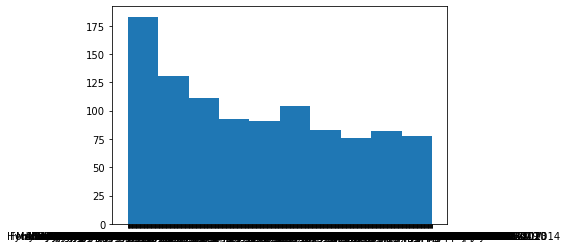

Location


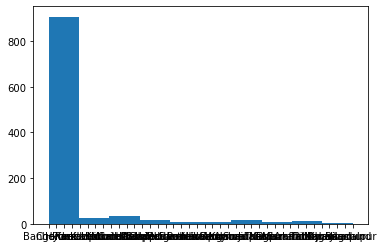

Price


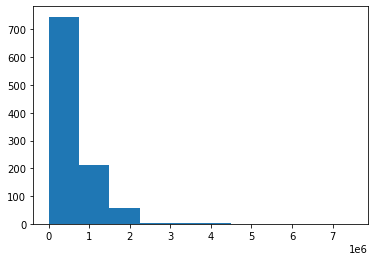

Kms_driven


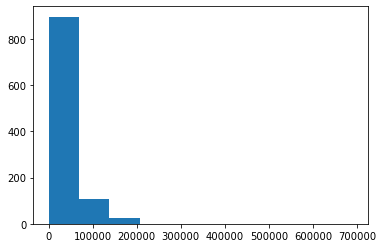

Fuel_type


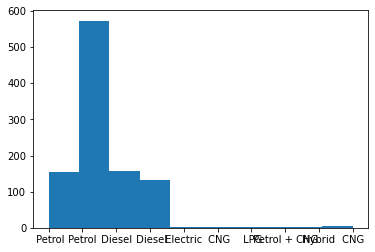

Owner


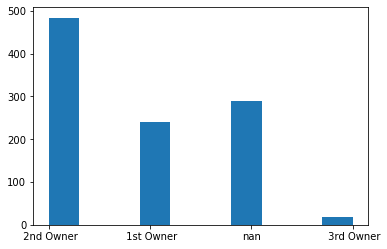

Year


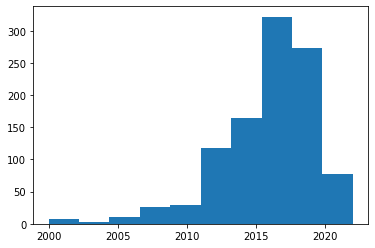

Company


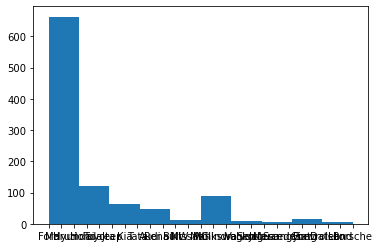

In [495]:
for i in ['Name', 'Location', 'Price', 'Kms_driven', 'Fuel_type', 'Owner', 'Year', 'Company']:
    print(i)
    plt.hist(df[i])
    plt.show()

In [496]:
# больше всего машин: на бензине; имевших 2 владельца; 2016-2017 года выпуска 

* построение эмпирического распределения каждого существенного признака

<AxesSubplot:>

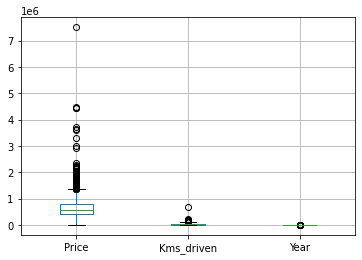

In [497]:
df.boxplot()

In [498]:
for i in ['Name', 'Location', 'Price', 'Kms_driven', 'Fuel_type', 'Owner', 'Year', 'Company']:
    print(i)
    print(df[i].value_counts())

Name
Maruti Suzuki Baleno - 2016                17
Maruti Suzuki Baleno - 2017                10
Hyundai Venue - 2019                        8
Maruti Suzuki Baleno - 2018                 8
Maruti Suzuki Eeco - 2019                   8
                                           ..
Maruti Suzuki Swift VDi - 2010              1
Maruti Suzuki Alto K10 - 2017               1
Maruti Suzuki Wagon R - 2007                1
Ford Ikon - 2009                            1
Ford Figo Duratec Petrol EXI 1.2 - 2015     1
Name: Name, Length: 691, dtype: int64
Location
Pune                  324
Chennai               315
Bangalore             257
Kolkata                20
Mumbai                 19
Madurai                12
Hyderabad              11
Delhi                  10
Jaipur                 10
Trichy                  8
Ahmedabad               5
Nagpur                  5
NaviMumbai              3
Pondicherry             2
Kozhikode               2
Surat                   2
Bhubaneswar             2


In [499]:
# процентная доля каждого значения
for i in ['Name', 'Location', 'Price', 'Kms_driven', 'Fuel_type', 'Owner', 'Year', 'Company']:
    print(i)
    print(df[i].value_counts(normalize=True))

Name
Maruti Suzuki Baleno - 2016                0.016473
Maruti Suzuki Baleno - 2017                0.009690
Hyundai Venue - 2019                       0.007752
Maruti Suzuki Baleno - 2018                0.007752
Maruti Suzuki Eeco - 2019                  0.007752
                                             ...   
Maruti Suzuki Swift VDi - 2010             0.000969
Maruti Suzuki Alto K10 - 2017              0.000969
Maruti Suzuki Wagon R - 2007               0.000969
Ford Ikon - 2009                           0.000969
Ford Figo Duratec Petrol EXI 1.2 - 2015    0.000969
Name: Name, Length: 691, dtype: float64
Location
Pune                  0.313953
Chennai               0.305233
Bangalore             0.249031
Kolkata               0.019380
Mumbai                0.018411
Madurai               0.011628
Hyderabad             0.010659
Delhi                 0.009690
Jaipur                0.009690
Trichy                0.007752
Ahmedabad             0.004845
Nagpur                0.004845
Na

* анализ количества и распределения отсутствующих значений

In [500]:
df.isna().sum()

Name          0
Location      0
Price         6
Kms_driven    2
Fuel_type     0
Owner         0
Year          0
Company       0
dtype: int64


* построение корреляционной матрицы

In [501]:
df.corr() 

,Price,Kms_driven,Year
Price,1.000000,-0.027398,0.392302
Kms_driven,-0.027398,1.000000,-0.141198
Year,0.392302,-0.141198,1.000000


признаки слабо коррелируют

3.3 Провести подготовительную обработку данных, включающую следующие шаги:


* удаление или заполнение отсутствующих значений

In [502]:
df.isna().sum()

Name          0
Location      0
Price         6
Kms_driven    2
Fuel_type     0
Owner         0
Year          0
Company       0
dtype: int64

In [503]:
for i in ['Price', 'Kms_driven']:
    df[i] = df[i].fillna(df[i].mean())

In [504]:
df.Price = df.Price.astype(int)
df.Kms_driven = df.Kms_driven.astype(int)

In [505]:
nans = df.isna().sum()
nans[nans > 0]

Series([], dtype: int64)


* приведение всех признаков к бинарной либо числовой шкале

In [506]:
df.dtypes

Name          object
Location      object
Price          int64
Kms_driven     int64
Fuel_type     object
Owner         object
Year           int64
Company       object
dtype: object

In [507]:
for i in ['Name', 'Location', 'Fuel_type', 'Owner', 'Company']:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

In [508]:
df.dtypes

Name          int16
Location       int8
Price         int64
Kms_driven    int64
Fuel_type      int8
Owner          int8
Year          int64
Company        int8
dtype: object

In [509]:
df.head()

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,50,2,380000,35056,7,1,2015,5
1,547,2,465000,44,7,0,2016,14
2,132,2,1350000,42917,7,3,2018,7
3,217,7,1019699,16112,8,1,2019,7
4,105,33,713499,30988,8,1,2017,6



* удаление несущественных либо избыточных признаков - не требуется

3.4 Использовать несколько моделей (не менее 3) машинного обучения для решения поставленной задачи. Сформировать сводную таблицу результатов обучения, включающую время обучения модели и основные метрики (accuracy, precision, recall, f1 для классификации; r2, mse, mape для регрессии).

In [518]:
from sklearn import metrics
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [511]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [512]:
X = df.drop(columns = ['Price'])
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [513]:
reg,acc,prec,rec,r2,mape,t = [], [], [], [], [], [], []

def make_model(x_train, y_train, x_test, y_test, model, name = ''):
    start_time = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    t.append(time.time() - start_time)
    reg.append(name)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    prec.append(metrics.precision_score(y_test, y_pred, average="macro"))
    rec.append(metrics.recall_score(y_test, y_pred, average="macro"))
    r2.append(r2_score(y_test, y_pred))
    mape.append(MAPE(y_test, y_pred))

In [514]:
df.dtypes

Name          int16
Location       int8
Price         int64
Kms_driven    int64
Fuel_type      int8
Owner          int8
Year          int64
Company        int8
dtype: object

In [515]:
LR = LogisticRegression()
make_model(x_train, y_train, x_test, y_test, LR, name = 'LR')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. U

In [519]:
gauss_SVC= svm.SVC(kernel='rbf')
make_model(x_train, y_train, x_test, y_test, gauss_SVC, name = 'gauss_SVC')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [520]:
poly_SVC= svm.SVC(kernel='poly')
make_model(x_train, y_train, x_test, y_test, poly_SVC, name = 'poly_SVC')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [521]:
KNC = KNeighborsClassifier()
make_model(x_train, y_train, x_test, y_test, KNC, name = 'KNC')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [522]:
ex1 = pd.DataFrame(columns = ['name','accuracy','precision','recall','time'])
ex1['name'] = reg
ex1['accuracy'] = acc
ex1['precision'] = prec
ex1['recall'] = rec
ex1['time'] = t
ex1['R^2'] = r2
ex1['MAPE'] = mape
ex1

,name,accuracy,precision,recall,time,R^2,MAPE
0,LR,0.019324,0.000525,0.010309,0.964964,-0.767728,55.612015
1,gauss_SVC,0.019324,0.000269,0.010309,0.734175,-0.844516,62.783979
2,poly_SVC,0.014493,0.000179,0.005128,0.883278,-0.962424,63.770091
3,KNC,0.004831,0.001661,0.001661,0.025179,-0.529683,6255.595277
